In [131]:
# importing necessary  packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
# converting given data into the pandas dataframe
df=pd.DataFrame({"ID":[1,2,3,4,5,6],
                "Hours_Studied":[5,3,None,6,2,4],
                "Final_Score":[78,65,82,80,60,75]})
df

,ID,Hours_Studied,Final_Score
0,1,5.0,78
1,2,3.0,65
2,3,NaN,82
3,4,6.0,80
4,5,2.0,60
5,6,4.0,75


In [135]:
# checking the data and each column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6 non-null      int64  
 1   Hours_Studied  5 non-null      float64
 2   Final_Score    6 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [137]:
# checking the null values 
df.isna().sum()

ID               0
Hours_Studied    1
Final_Score      0
dtype: int64

we observe that Hours_studied are contain 1 null value

In [140]:
# the dataset is very small i used knn imputation technique
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=3)
df=pd.DataFrame(impute.fit_transform(df),columns=df.columns)
df

,ID,Hours_Studied,Final_Score
0,1.0,5.0,78.0
1,2.0,3.0,65.0
2,3.0,5.0,82.0
3,4.0,6.0,80.0
4,5.0,2.0,60.0
5,6.0,4.0,75.0


In [142]:
# ids  are the unique values so we can drop that column
df.drop("ID",axis=1,inplace=True)
df

,Hours_Studied,Final_Score
0,5.0,78.0
1,3.0,65.0
2,5.0,82.0
3,6.0,80.0
4,2.0,60.0
5,4.0,75.0


from the above we observed that 2nd index postion value is filled with the mean  of the "Hours_Studied"

### EDA

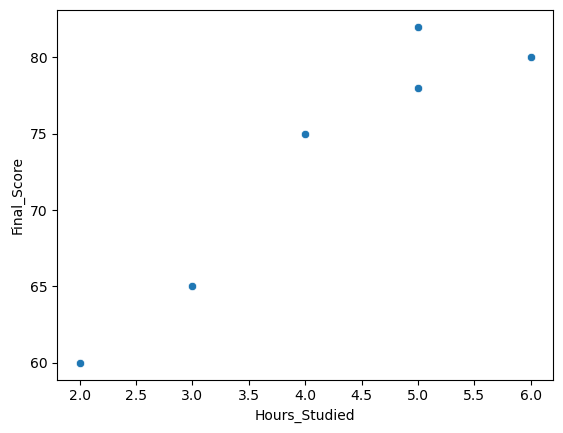

In [146]:
sns.scatterplot(x=df["Hours_Studied"],y=df["Final_Score"])
plt.show()

from the graph we can consider the graph in that is positive 

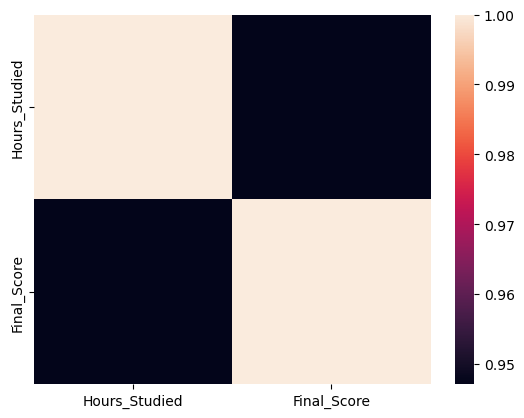

In [149]:
relation=df.corr()
sns.heatmap(relation,annot=True)
plt.show()

In [150]:
# dividing the dependent and independent variables
y=df.pop("Final_Score")
x=df

In [151]:
x

,Hours_Studied
0,5.0
1,3.0
2,5.0
3,6.0
4,2.0
5,4.0


In [154]:
y

0    78.0
1    65.0
2    82.0
3    80.0
4    60.0
5    75.0
Name: Final_Score, dtype: float64

In [157]:
# importing the model and training the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [159]:
model.intercept_

49.61538461538461

In [161]:
model.coef_

array([5.69230769])

In [171]:
value=float(input("Enter the no of hours to predict the final_score"))
y_pred=model.predict([[value]])
print(f"the marks you will get {round(y_pred[0],2)} if you study for {value} hours")

Enter the no of hours to predict the final_score 1


the marks you will get 55.31 if you study for 1.0 hours


In [93]:
print(f"the model give's: {round(model.score(x,y),3)*100}% score" )

the model give's: 89.7% score
